# Regression Model
Dataset: NOAA Reef Check Bleaching Data from Kaggle

Link: https://www.kaggle.com/datasets/oasisdata/noaa-reef-check-coral-bleaching-data

The dataset has been prepared beforehand and the CSV can be found at: https://github.com/alyshapm/coral-reef-bleaching/blob/main/NOAA_ReefCheck/NOAA_int.csv

A regression model is used for the dataset to find out the importance of the features of the dataset. These features will then be used for the other models.


In [10]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
import seaborn as sns
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [11]:
# Accessing the dataset
url = 'https://raw.githubusercontent.com/alyshapm/coral-reef-bleaching/main/NOAA_ReefCheck/NOAA_int.csv'
df = pd.read_csv(url)
df.head()  

,Bleaching,Ocean,Year,Depth,Storms,HumanImpact,Siltation,Dynamite,Poison,Sewage,Industrial,Commercial
0,0,Atlantic,2005,4.0,1,3,2,0,0,3,0,0
1,0,Red Sea,2004,6.0,0,3,1,0,0,1,0,0
2,0,Pacific,1998,3.0,0,1,0,0,0,0,1,0
3,0,Pacific,1998,10.0,0,1,0,0,0,0,1,0
4,0,Atlantic,1997,10.0,0,3,0,0,0,3,2,0


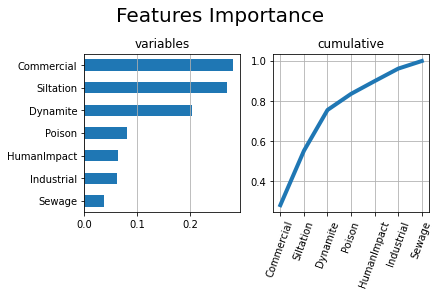

In [17]:
X = df[['HumanImpact','Siltation','Dynamite','Poison','Sewage','Industrial','Commercial']]

y = df["Bleaching"]

feature_names = ['HumanImpact','Siltation','Dynamite','Poison','Sewage','Industrial','Commercial']


## Call model
model = ensemble.GradientBoostingRegressor()

## Importance
model.fit(X,y)
importances = model.feature_importances_

## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, "VARIABLE":feature_names}).sort_values("IMPORTANCE", ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, constrained_layout=True)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

plt.show()